In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_timed_value_list(total_time_ms:int, time_delay_start_ms:int, time_delay_end_ms:int,
                        frequency:int, duty_cycle, active_value, inactive_value,
                             res_x, res_y):
    timed_value_list = []


    #for i in range(time_delay_start_ms):
    #    timed_value_list.append(inactive_value)

    stimulus_time_duration = total_time_ms - time_delay_start_ms - time_delay_end_ms
    n_stimulus_appearances = int((stimulus_time_duration/1000) * frequency)
    print("stimulus time duration {}\n n stimulus appearances {}".format(stimulus_time_duration, n_stimulus_appearances))
    stimulus_start_time = time_delay_start_ms - 1 #-1 for 0 indexing
    stimulus_end_time = stimulus_start_time + stimulus_time_duration

    firing_times_ms = np.linspace(start=stimulus_start_time,
                               stop=stimulus_end_time,
                               num=n_stimulus_appearances,
                               endpoint=False)

    cycle_time_duration_ms = 1000/frequency
    print("cycle time duration ms: {}".format(cycle_time_duration_ms))
    fire_time_duration_ms = cycle_time_duration_ms * duty_cycle
    print("fire time duration ms: {}".format(fire_time_duration_ms))
    

    fire_end_times = firing_times_ms + fire_time_duration_ms

    current_fire_index = 0
    current_firing_start_time = firing_times_ms[current_fire_index]
    current_firing_end_time = fire_end_times[current_fire_index]
    
    print(stimulus_start_time)
    print(firing_times_ms)
    print(fire_end_times)
    
    for i in range(total_time_ms):
        if i < stimulus_start_time:
            timed_value_list.append(np.ones((res_x, res_y))*inactive_value)
        
        elif i >= stimulus_end_time:
            timed_value_list.append(np.ones((res_x, res_y))*inactive_value)
        
        elif i >= stimulus_start_time:
            if i >= current_firing_start_time:

                #if between firing start and end times, add active value
                if i < current_firing_end_time:
                    timed_value_list.append(np.ones((res_x, res_y))*active_value)

                #if greater than firing start and end times, move to next firing times
                #unless if list end has been reached
                else:
                    current_fire_index += 1
                    if current_fire_index >= firing_times_ms.shape[0]:
                        current_firing_start_time = np.inf
                        current_firing_end_time = np.inf
                    else:
                        current_firing_start_time = firing_times_ms[current_fire_index]; current_firing_end_time = fire_end_times[current_fire_index]
                    
                    assert(i < current_firing_start_time)
                    timed_value_list.append(np.ones((res_x, res_y))*inactive_value)

            #if less than firing start time, append inactive value
            else:
                timed_value_list.append(np.ones((res_x, res_y))*inactive_value)

    return np.stack(timed_value_list, axis=0)

stimulus time duration 1000
 n stimulus appearances 10
999
[ 999. 1099. 1199. 1299. 1399. 1499. 1599. 1699. 1799. 1899.]
[1009. 1109. 1209. 1309. 1409. 1509. 1609. 1709. 1809. 1909.]
sum of timed value list: 100.0


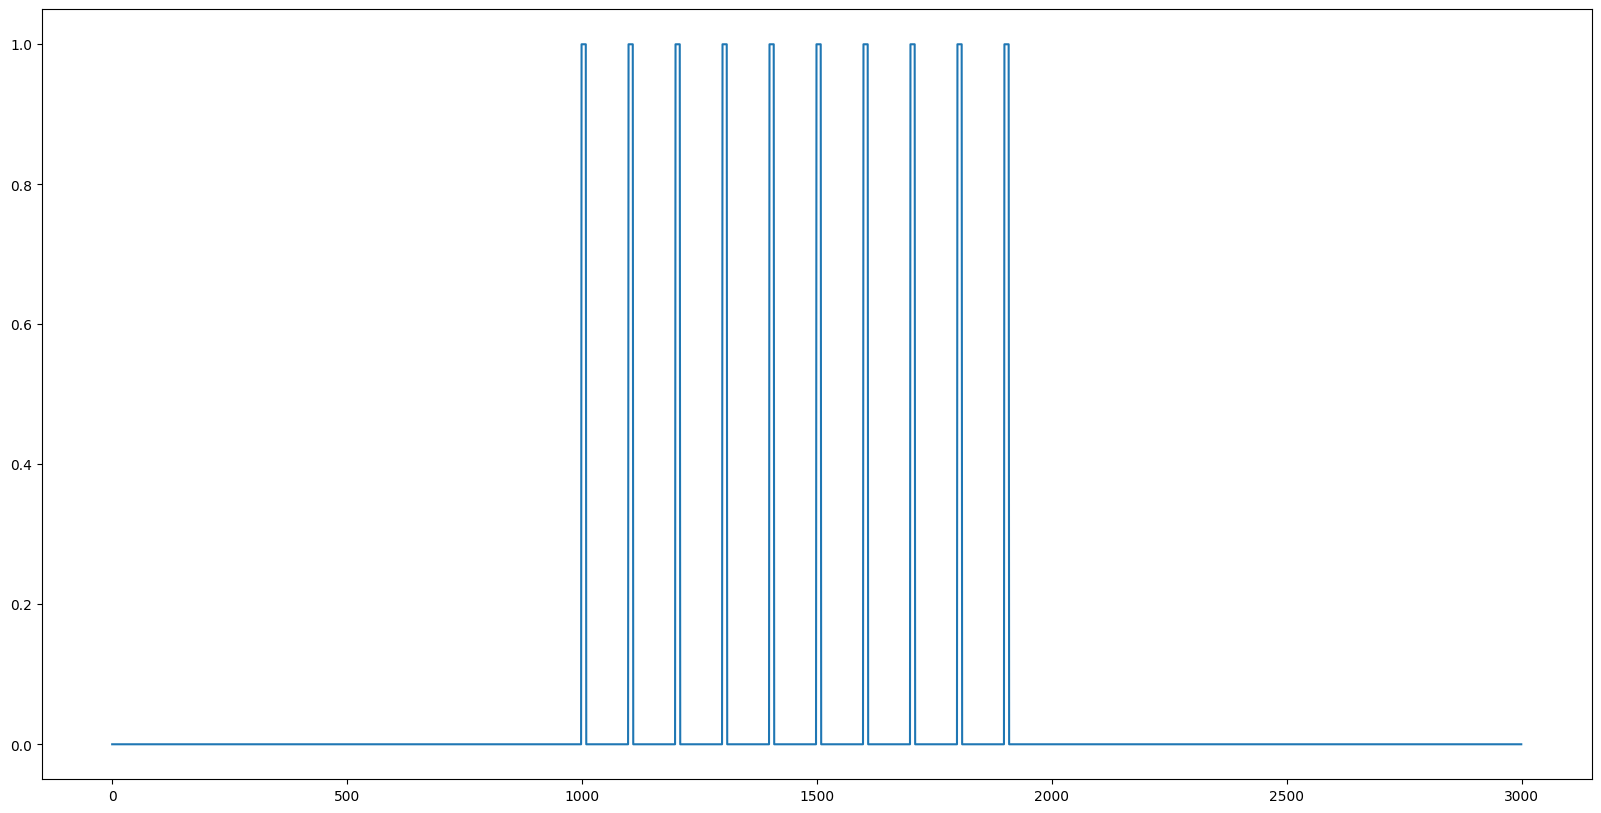

In [74]:
timed_value_list = generate_timed_value_list(total_time_ms=3000, time_delay_start_ms=1000, time_delay_end_ms=1000,
                        frequency=10, duty_cycle=.1, active_value=1, inactive_value=0,
                                            res_x=100,res_y=100)
timed_value_list = timed_value_list[:,0,0]
print("sum of timed value list: {}".format(np.sum(timed_value_list)))
x = [i for i in range(3000)]
plt.figure(figsize=(20,10))
plt.plot(x,timed_value_list)

stimulus time duration 1000
 n stimulus appearances 10
999
[ 999. 1099. 1199. 1299. 1399. 1499. 1599. 1699. 1799. 1899.]
[1049. 1149. 1249. 1349. 1449. 1549. 1649. 1749. 1849. 1949.]
sum of timed value list: 500


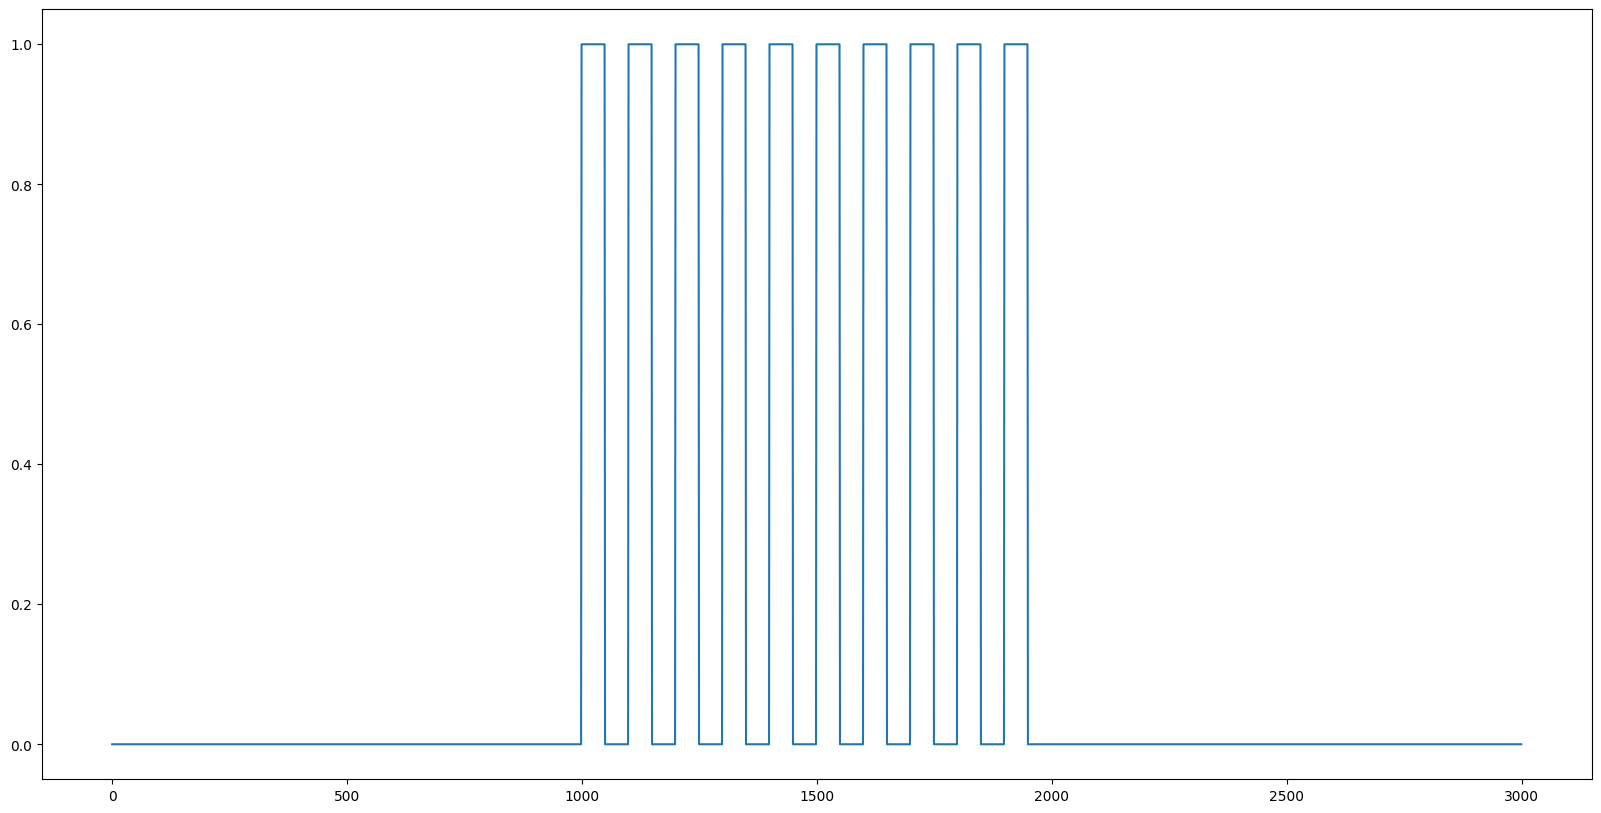

In [54]:
timed_value_list = generate_timed_value_list(total_time_ms=3000, time_delay_start_ms=1000, time_delay_end_ms=1000,
                        frequency=10, duty_cycle=.5, active_value=1, inactive_value=0)
print("sum of timed value list: {}".format(np.sum(timed_value_list)))
x = [i for i in range(3000)]
plt.figure(figsize=(20,10))
plt.plot(x,timed_value_list)

stimulus time duration 1000
 n stimulus appearances 10
999
[ 999. 1099. 1199. 1299. 1399. 1499. 1599. 1699. 1799. 1899.]
[1089. 1189. 1289. 1389. 1489. 1589. 1689. 1789. 1889. 1989.]
sum of timed value list: 900


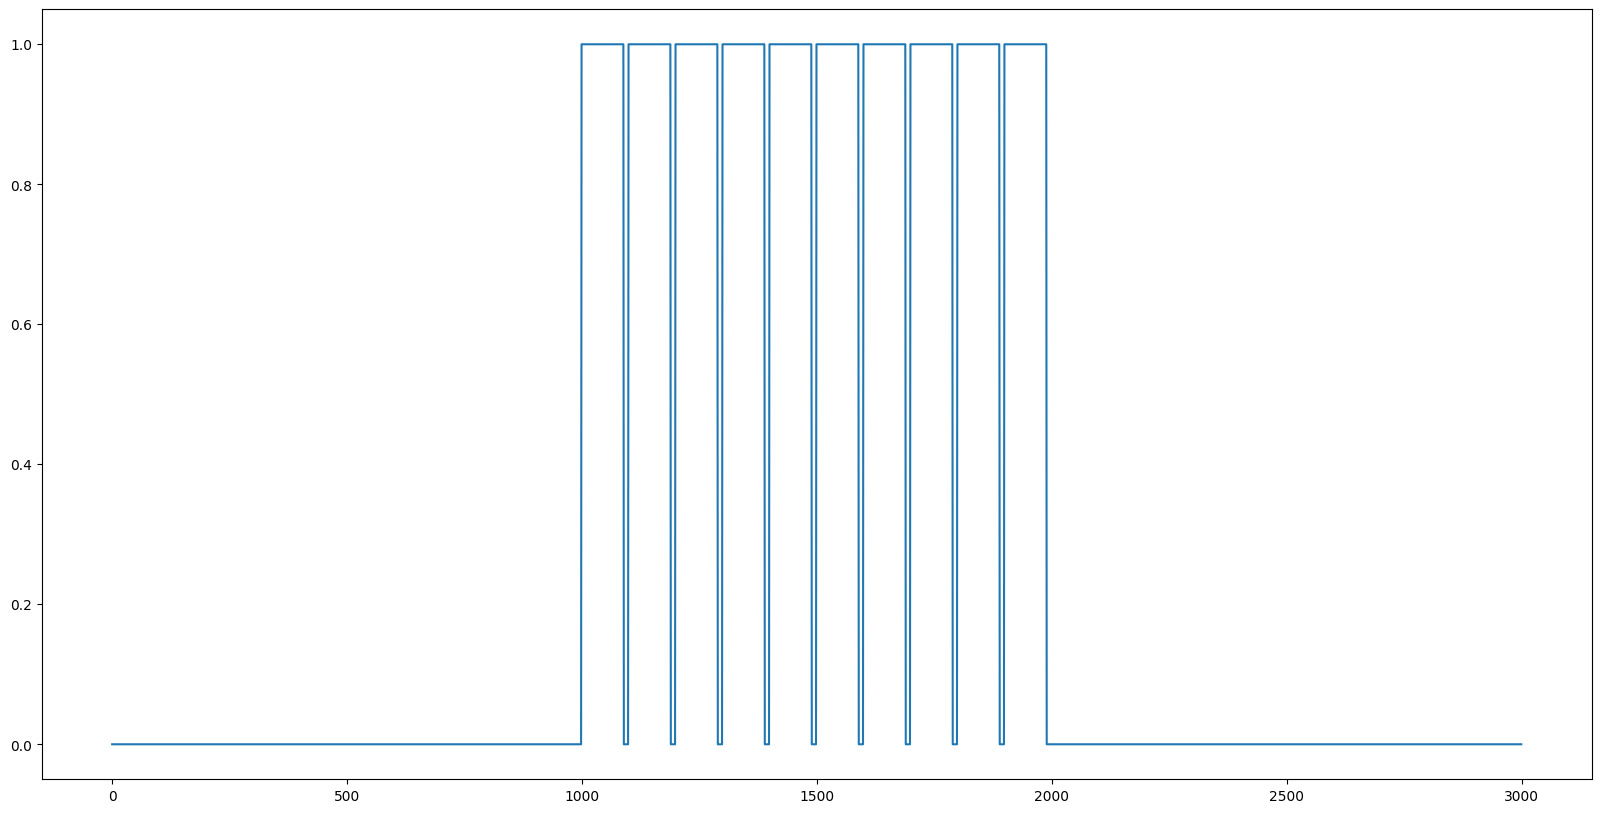

In [55]:
timed_value_list = generate_timed_value_list(total_time_ms=3000, time_delay_start_ms=1000, time_delay_end_ms=1000,
                        frequency=10, duty_cycle=.9, active_value=1, inactive_value=0)
print("sum of timed value list: {}".format(np.sum(timed_value_list)))
x = [i for i in range(3000)]
plt.figure(figsize=(20,10))
plt.plot(x,timed_value_list)


stimulus time duration 1000
 n stimulus appearances 20
999
[ 999. 1049. 1099. 1149. 1199. 1249. 1299. 1349. 1399. 1449. 1499. 1549.
 1599. 1649. 1699. 1749. 1799. 1849. 1899. 1949.]
[1004. 1054. 1104. 1154. 1204. 1254. 1304. 1354. 1404. 1454. 1504. 1554.
 1604. 1654. 1704. 1754. 1804. 1854. 1904. 1954.]
sum of timed value list: 100


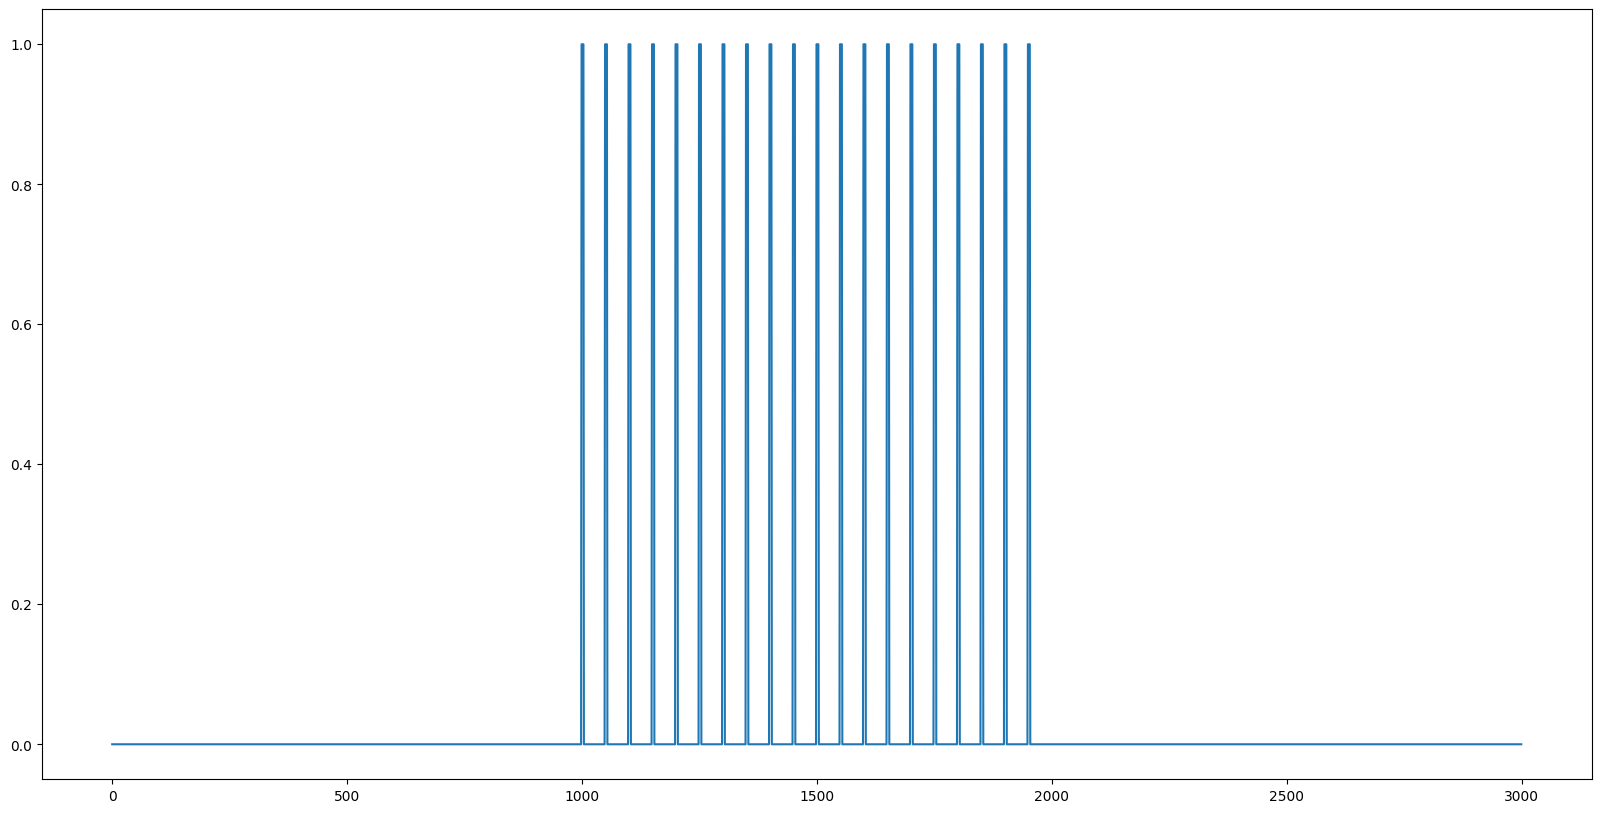

In [56]:
timed_value_list = generate_timed_value_list(total_time_ms=3000, time_delay_start_ms=1000, time_delay_end_ms=1000,
                        frequency=20, duty_cycle=.1, active_value=1, inactive_value=0)
print("sum of timed value list: {}".format(np.sum(timed_value_list)))
x = [i for i in range(3000)]
plt.figure(figsize=(20,10))
plt.plot(x,timed_value_list)

stimulus time duration 1000
 n stimulus appearances 30
999
[ 999.         1032.33333333 1065.66666667 1099.         1132.33333333
 1165.66666667 1199.         1232.33333333 1265.66666667 1299.
 1332.33333333 1365.66666667 1399.         1432.33333333 1465.66666667
 1499.         1532.33333333 1565.66666667 1599.         1632.33333333
 1665.66666667 1699.         1732.33333333 1765.66666667 1799.
 1832.33333333 1865.66666667 1899.         1932.33333333 1965.66666667]
[1002.33333333 1035.66666667 1069.         1102.33333333 1135.66666667
 1169.         1202.33333333 1235.66666667 1269.         1302.33333333
 1335.66666667 1369.         1402.33333333 1435.66666667 1469.
 1502.33333333 1535.66666667 1569.         1602.33333333 1635.66666667
 1669.         1702.33333333 1735.66666667 1769.         1802.33333333
 1835.66666667 1869.         1902.33333333 1935.66666667 1969.        ]
sum of timed value list: 100


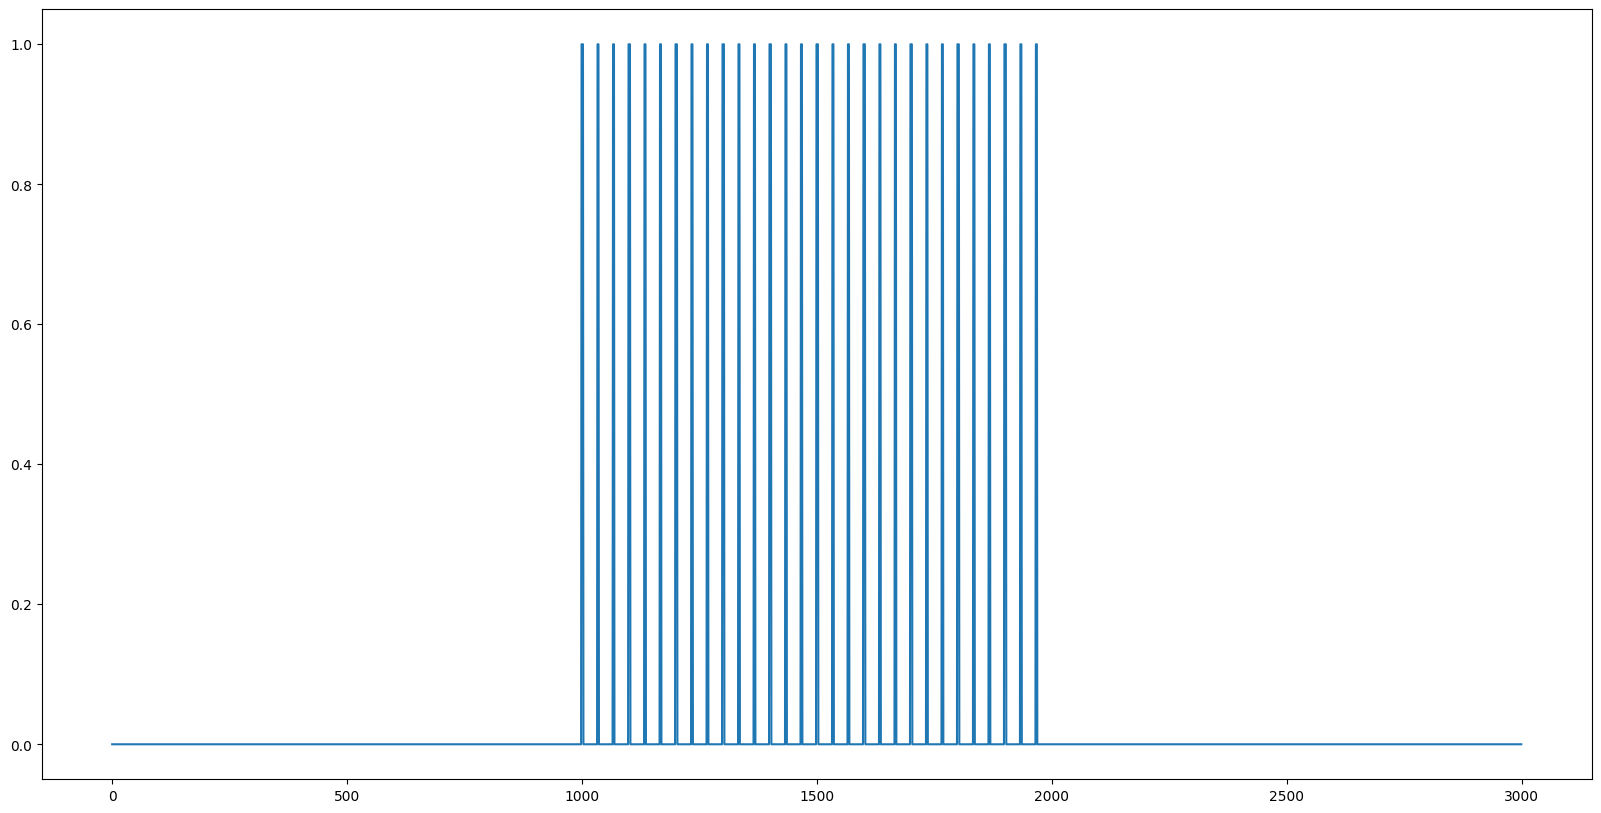

In [57]:
timed_value_list = generate_timed_value_list(total_time_ms=3000, time_delay_start_ms=1000, time_delay_end_ms=1000,
                        frequency=30, duty_cycle=.1, active_value=1, inactive_value=0)
print("sum of timed value list: {}".format(np.sum(timed_value_list)))
x = [i for i in range(3000)]
plt.figure(figsize=(20,10))
plt.plot(x,timed_value_list)

In [60]:
print(np.unique(timed_value_list))
print(timed_value_list)

[0 1]
[0 0 0 ... 0 0 0]


In [69]:
timed_value_list = generate_timed_value_list(total_time_ms=3000, time_delay_start_ms=1000, time_delay_end_ms=1000,
                        frequency=100, duty_cycle=.5, active_value=2, inactive_value=-1)
print("sum of timed value list: {}".format(np.sum(timed_value_list)))
x = [i for i in range(3000)]
plt.figure(figsize=(200,100))
plt.plot(x,timed_value_list)

stimulus time duration 1000
 n stimulus appearances 100
999
[ 999. 1009. 1019. 1029. 1039. 1049. 1059. 1069. 1079. 1089. 1099. 1109.
 1119. 1129. 1139. 1149. 1159. 1169. 1179. 1189. 1199. 1209. 1219. 1229.
 1239. 1249. 1259. 1269. 1279. 1289. 1299. 1309. 1319. 1329. 1339. 1349.
 1359. 1369. 1379. 1389. 1399. 1409. 1419. 1429. 1439. 1449. 1459. 1469.
 1479. 1489. 1499. 1509. 1519. 1529. 1539. 1549. 1559. 1569. 1579. 1589.
 1599. 1609. 1619. 1629. 1639. 1649. 1659. 1669. 1679. 1689. 1699. 1709.
 1719. 1729. 1739. 1749. 1759. 1769. 1779. 1789. 1799. 1809. 1819. 1829.
 1839. 1849. 1859. 1869. 1879. 1889. 1899. 1909. 1919. 1929. 1939. 1949.
 1959. 1969. 1979. 1989.]
[1004. 1014. 1024. 1034. 1044. 1054. 1064. 1074. 1084. 1094. 1104. 1114.
 1124. 1134. 1144. 1154. 1164. 1174. 1184. 1194. 1204. 1214. 1224. 1234.
 1244. 1254. 1264. 1274. 1284. 1294. 1304. 1314. 1324. 1334. 1344. 1354.
 1364. 1374. 1384. 1394. 1404. 1414. 1424. 1434. 1444. 1454. 1464. 1474.
 1484. 1494. 1504. 1514. 1524. 1534. 1

In [77]:
timed_value_list = generate_timed_value_list(total_time_ms=3000, time_delay_start_ms=1000, time_delay_end_ms=1000,
                        frequency=77, duty_cycle=.2343, active_value=2, inactive_value=-1,
                                             res_x=100,res_y=100)
timed_value_list = timed_value_list[:,0,0]
print("sum of timed value list: {}".format(np.sum(timed_value_list)))
x = [i for i in range(3000)]
plt.figure(figsize=(200,100))
plt.plot(x,timed_value_list)
plt.savefig('test_plot_1.png')

stimulus time duration 1000
 n stimulus appearances 77
cycle time duration ms: 12.987012987012987
fire time duration ms: 3.042857142857143
999
[ 999.         1011.98701299 1024.97402597 1037.96103896 1050.94805195
 1063.93506494 1076.92207792 1089.90909091 1102.8961039  1115.88311688
 1128.87012987 1141.85714286 1154.84415584 1167.83116883 1180.81818182
 1193.80519481 1206.79220779 1219.77922078 1232.76623377 1245.75324675
 1258.74025974 1271.72727273 1284.71428571 1297.7012987  1310.68831169
 1323.67532468 1336.66233766 1349.64935065 1362.63636364 1375.62337662
 1388.61038961 1401.5974026  1414.58441558 1427.57142857 1440.55844156
 1453.54545455 1466.53246753 1479.51948052 1492.50649351 1505.49350649
 1518.48051948 1531.46753247 1544.45454545 1557.44155844 1570.42857143
 1583.41558442 1596.4025974  1609.38961039 1622.37662338 1635.36363636
 1648.35064935 1661.33766234 1674.32467532 1687.31168831 1700.2987013
 1713.28571429 1726.27272727 1739.25974026 1752.24675325 1765.23376623
 1778.

In [14]:
timed_value_list = generate_timed_value_list(total_time_ms=3000, time_delay_start_ms=1000, time_delay_end_ms=1000,
                        frequency=77, duty_cycle=.2, active_value=1, inactive_value=0,
                                             res_x=100,res_y=100)
timed_value_list = timed_value_list[:,0,0]
print("sum of timed value list: {}".format(np.sum(timed_value_list)))
x = [i for i in range(3000)]
plt.figure(figsize=(200,100))
plt.rcParams.update({'font.size': 100})
plt.plot(x,timed_value_list)
plt.savefig('test_plot_2.png')

stimulus time duration 1000
 n stimulus appearances 77
cycle time duration ms: 12.987012987012987
fire time duration ms: 2.5974025974025974
999
[ 999.         1011.98701299 1024.97402597 1037.96103896 1050.94805195
 1063.93506494 1076.92207792 1089.90909091 1102.8961039  1115.88311688
 1128.87012987 1141.85714286 1154.84415584 1167.83116883 1180.81818182
 1193.80519481 1206.79220779 1219.77922078 1232.76623377 1245.75324675
 1258.74025974 1271.72727273 1284.71428571 1297.7012987  1310.68831169
 1323.67532468 1336.66233766 1349.64935065 1362.63636364 1375.62337662
 1388.61038961 1401.5974026  1414.58441558 1427.57142857 1440.55844156
 1453.54545455 1466.53246753 1479.51948052 1492.50649351 1505.49350649
 1518.48051948 1531.46753247 1544.45454545 1557.44155844 1570.42857143
 1583.41558442 1596.4025974  1609.38961039 1622.37662338 1635.36363636
 1648.35064935 1661.33766234 1674.32467532 1687.31168831 1700.2987013
 1713.28571429 1726.27272727 1739.25974026 1752.24675325 1765.23376623
 1778

In [4]:
timed_value_list = generate_timed_value_list(total_time_ms=3000, time_delay_start_ms=1000, time_delay_end_ms=1000,
                        frequency=31, duty_cycle=.5, active_value=1, inactive_value=0,
                                             res_x=100,res_y=100)
timed_value_list = timed_value_list[:,0,0]
print("sum of timed value list: {}".format(np.sum(timed_value_list)))
x = [i for i in range(3000)]
plt.figure(figsize=(200,100))
plt.plot(x,timed_value_list)
plt.savefig('test_plot_3.png')

stimulus time duration 1000
 n stimulus appearances 31
cycle time duration ms: 32.25806451612903
fire time duration ms: 16.129032258064516
999
[ 999.         1031.25806452 1063.51612903 1095.77419355 1128.03225806
 1160.29032258 1192.5483871  1224.80645161 1257.06451613 1289.32258065
 1321.58064516 1353.83870968 1386.09677419 1418.35483871 1450.61290323
 1482.87096774 1515.12903226 1547.38709677 1579.64516129 1611.90322581
 1644.16129032 1676.41935484 1708.67741935 1740.93548387 1773.19354839
 1805.4516129  1837.70967742 1869.96774194 1902.22580645 1934.48387097
 1966.74193548]
[1015.12903226 1047.38709677 1079.64516129 1111.90322581 1144.16129032
 1176.41935484 1208.67741935 1240.93548387 1273.19354839 1305.4516129
 1337.70967742 1369.96774194 1402.22580645 1434.48387097 1466.74193548
 1499.         1531.25806452 1563.51612903 1595.77419355 1628.03225806
 1660.29032258 1692.5483871  1724.80645161 1757.06451613 1789.32258065
 1821.58064516 1853.83870968 1886.09677419 1918.35483871 1950

In [5]:
print(timed_value_list[1000:1100])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1.]


In [12]:
timed_value_list = generate_timed_value_list(total_time_ms=3000, time_delay_start_ms=1000, time_delay_end_ms=1000,
                        frequency=100, duty_cycle=.1, active_value=1, inactive_value=0,
                                             res_x=100,res_y=100)
timed_value_list = timed_value_list[:,0,0]
print("sum of timed value list: {}".format(np.sum(timed_value_list)))
print(timed_value_list[999:1100])
print(timed_value_list[1400:1500])

stimulus time duration 1000
 n stimulus appearances 100
cycle time duration ms: 10.0
fire time duration ms: 1.0
999
[ 999. 1009. 1019. 1029. 1039. 1049. 1059. 1069. 1079. 1089. 1099. 1109.
 1119. 1129. 1139. 1149. 1159. 1169. 1179. 1189. 1199. 1209. 1219. 1229.
 1239. 1249. 1259. 1269. 1279. 1289. 1299. 1309. 1319. 1329. 1339. 1349.
 1359. 1369. 1379. 1389. 1399. 1409. 1419. 1429. 1439. 1449. 1459. 1469.
 1479. 1489. 1499. 1509. 1519. 1529. 1539. 1549. 1559. 1569. 1579. 1589.
 1599. 1609. 1619. 1629. 1639. 1649. 1659. 1669. 1679. 1689. 1699. 1709.
 1719. 1729. 1739. 1749. 1759. 1769. 1779. 1789. 1799. 1809. 1819. 1829.
 1839. 1849. 1859. 1869. 1879. 1889. 1899. 1909. 1919. 1929. 1939. 1949.
 1959. 1969. 1979. 1989.]
[1000. 1010. 1020. 1030. 1040. 1050. 1060. 1070. 1080. 1090. 1100. 1110.
 1120. 1130. 1140. 1150. 1160. 1170. 1180. 1190. 1200. 1210. 1220. 1230.
 1240. 1250. 1260. 1270. 1280. 1290. 1300. 1310. 1320. 1330. 1340. 1350.
 1360. 1370. 1380. 1390. 1400. 1410. 1420. 1430. 1440. 